In [1]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [2]:
# Task :- Model Prediction for Admission 

# Model Training

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/srinivasav22/Graduate-Admission-Prediction/master/Admission_Predict_Ver1.1.csv")

In [4]:
df.head()     

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
df.info()    #this dataset is well cleaned 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
df.isnull().any().sum()   #Checking Null values

0

In [7]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [8]:
#striping spaces from columns 
df.columns=df.columns.str.strip()

In [9]:
df.columns     #now space are removed 

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR', 'CGPA', 'Research', 'Chance of Admit'],
      dtype='object')

In [10]:
#taking indepenedent and dependent feature  Separate
df=df.drop("Research", axis=1)
x=df.drop('Chance of Admit' , axis=1)
y=df["Chance of Admit"]


In [11]:
x.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA
0,1,337,118,4,4.5,4.5,9.65
1,2,324,107,4,4.0,4.5,8.87
2,3,316,104,3,3.0,3.5,8.00
3,4,322,110,3,3.5,2.5,8.67
4,5,314,103,2,2.0,3.0,8.21


In [12]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

# Model traing 

In [13]:
#applying train_test_split 
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.33 , random_state=42)   #taking 33% test size


In [14]:
#using faeture selection making features into same scale 
scalar=StandardScaler()
x_train_sca=scalar.fit_transform(x_train)

<Axes: >

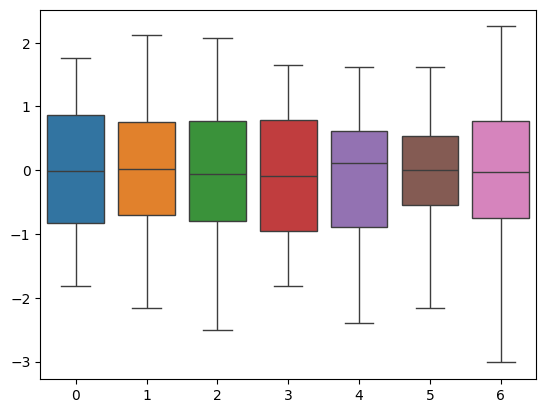

In [15]:
sns.boxplot(x_train_sca)    

In [16]:
x_test_sca=scalar.transform(x_test)

In [17]:
x_train_sca.shape , x_test_sca.shape

((335, 7), (165, 7))

In [18]:
y_train.shape , y_test.shape

((335,), (165,))

# SVR Model training

In [19]:
from sklearn.svm import SVR

In [20]:
svr=SVR()

In [21]:
svr.fit(x_train_sca , y_train)

SVR()

In [22]:
y_predict= svr.predict(x_test_sca)

In [23]:
y_predict

array([0.86946462, 0.72040697, 0.58144904, 0.71078953, 0.71213088,
       0.85174656, 0.52879432, 0.62660051, 0.69187036, 0.74846116,
       0.57964146, 0.7610366 , 0.65273837, 0.87538015, 0.82795255,
       0.48334034, 0.7875714 , 0.44516445, 0.53579188, 0.53424311,
       0.60410824, 0.55704452, 0.7135911 , 0.77317206, 0.64896711,
       0.5830847 , 0.84520134, 0.83489097, 0.61973344, 0.75416577,
       0.55309213, 0.79860721, 0.56141613, 0.83200294, 0.5960976 ,
       0.74665887, 0.54170979, 0.88507533, 0.62789717, 0.65874703,
       0.86712163, 0.45211021, 0.5923437 , 0.84796287, 0.82452501,
       0.49432231, 0.84627422, 0.7225244 , 0.7678569 , 0.86274562,
       0.84497728, 0.53896146, 0.71631945, 0.54999761, 0.91304647,
       0.60987967, 0.8558657 , 0.61172585, 0.66935923, 0.40910325,
       0.59311333, 0.68336723, 0.60514469, 0.64023678, 0.50045369,
       0.57137813, 0.8382356 , 0.85394616, 0.67759893, 0.70576695,
       0.58681819, 0.78868717, 0.70816931, 0.59393382, 0.55651

In [24]:
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score 

In [25]:
mae=mean_absolute_error(y_test , y_predict)

In [26]:
mae

0.05510048815824119

In [27]:
r2_square=r2_score(y_test , y_predict)

In [28]:
r2_square

0.7648567602096008

In [29]:
mse=mean_squared_error(y_test , y_predict)

In [30]:
mse

0.0048447505289936875

In [31]:
res=y_test - y_predict

<Axes: xlabel='Chance of Admit', ylabel='Count'>

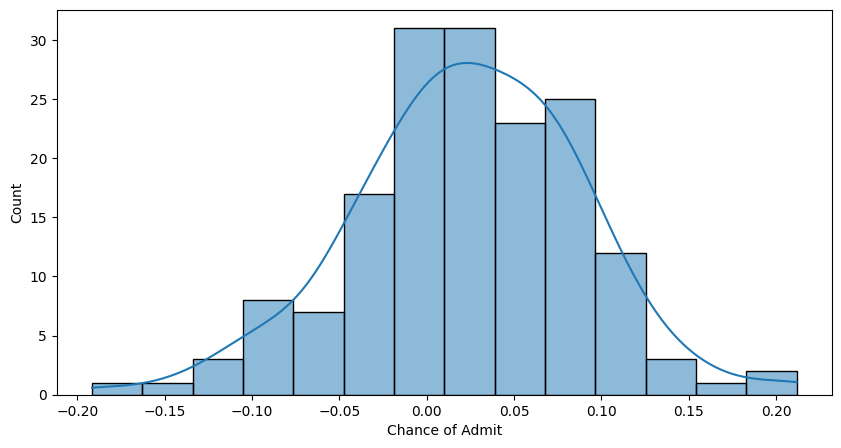

In [32]:
plt.figure(figsize=(10,5))   #its look Normal Distribution which is good
sns.histplot(res , kde=True)

In [ ]:
from sklearn.model_selection import GridSearchCV
para_gid={"C":[0.1 , 1 ,10,100],"gamma":[1,0.1 , 0.01 , 0.001],"kernel":['rbf', 'poly','sigmpoid']}
grid=GridSearchCV(svr, para_gid , refit=True , verbose=2, cv=5)
grid.fit(x_train_sca , y_train)   

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.4s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.1s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.2s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.3s
[CV] END ....................C=0.1, gamma=1, kernel=sigmpoid; total time=   0.0s
[CV] END ....................C=0.1, gamma=1, ke

In [ ]:
#GridsearchCv is taking time 

In [ ]:
plt.scatter(y_test , y_predict)    #Model is linear this is good 

In [ ]:
plt.scatter(res , y_predict)     #no shape this is good

In [ ]:
rmse=np.sqrt(mse)

In [ ]:
rmse

# Lets train Another model 

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lin_reg=LinearRegression()


In [ ]:
lin_reg.fit(x_train_sca , y_train)

In [ ]:
y_pred_lin=lin_reg.predict(x_test_sca)

In [ ]:
plt.scatter(y_test , y_pred_lin)

In [ ]:
mae_lin=mean_absolute_error(y_test, y_pred_lin)
mse_lin=mean_squared_error(y_test , y_pred_lin)
rmse_lin=np.sqrt(mse)
r2_sq_lin=r2_score(y_test , y_pred_lin)


In [ ]:
print(mae_lin)
print(mse_lin)
print(rmse_lin)
print(r2_sq_lin)

# linear Regression  Model performing well than SVR model 